<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제</h1>
<br/><br/>

### 아래는 카카오맵으로 본 학교의 일부 모습이다.
카카오맵 URL (https://map.kakao.com/)

![kakaomap1](kakaomap1.png)

#### 주요 건물을 노드(정점)로, 건물과 건물 사이의 길을 에지로 표현하고, 에지의 가중치값을 이동시간이라고 했을 때 그래프는 아래와 같이 만들어진다.



![kakaomap2](kakaomap2.png)

## 실습 1
####  위 그래프를  아래 draw_graph 함수를 사용하여 표현하시오. 단, 노드 위치는 마음대로 해도 된다.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
def draw_graph(graph, pos=None) :
    if pos == None : pos=nx.spring_layout(graph)
    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(graph, pos=pos, node_size=4000, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=10, font_family=font_name)
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_size=20, rotate=False)
    plt.show()

<br/>※ 풀이조건
<ol>
    <li>위 그림과 동일하게 그래프를 만들고, 노드 정보 및 에지 정보를 위한 리스트를 만든다.</li>
    <li>draw_graph의 인자로 주어질 그래프 변수를 만들고, 함수를 실행하여 그래프를 감상한다.</li>
    <li><b>만일 건물 이름의 한글이 깨져서 나올 시, 각 건물 이름을 영어로 구분만 할 수 있게 간단히 작성하여 다시 만든다.</b></li>
</ol>
<br/>※ 제한조건
<ol>
    <li>그래프가 이상이 없으면 정답으로 한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


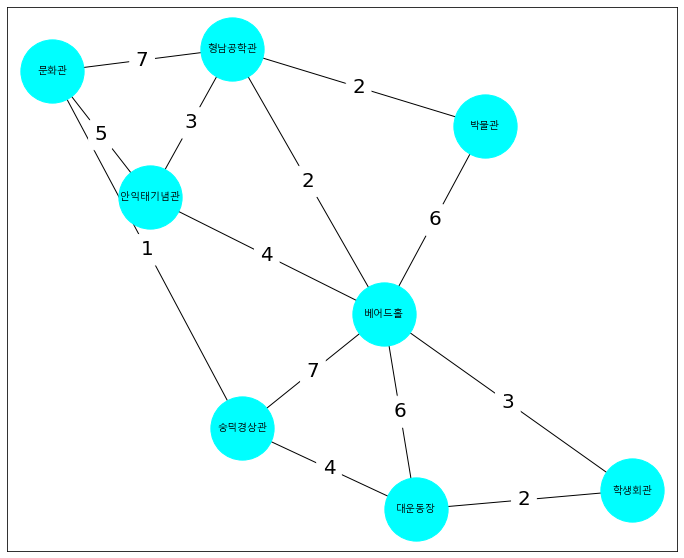

In [2]:
G = nx.Graph()
Nodes = ['문화관', '숭덕경상관', '형남공학관', '안익태기념관', '베어드홀', '학생회관', '대운동장', '박물관']
edges = [('문화관', '숭덕경상관', 1), ('문화관', '형남공학관', 7), ('문화관', '안익태기념관', 5),
        ('숭덕경상관', '대운동장', 4), ('숭덕경상관', '베어드홀', 7), ('대운동장', '베어드홀', 6),
        ('학생회관', '대운동장', 2), ('학생회관', '베어드홀', 3), ('베어드홀', '박물관', 6),
        ('베어드홀', '형남공학관', 2), ('베어드홀', '안익태기념관', 4), ('형남공학관', '박물관', 2),
        ('형남공학관', '안익태기념관', 3)]

G.add_nodes_from(Nodes)
G.add_weighted_edges_from(edges)
draw_graph(G)

## 실습 2

#### 위에서 만든 그래프에서 Prim's MST Algorithm을 이용해 최소 신장 트리 (Minimum Spanning Tree)를 구하시오.

<br/>※ 풀이조건
<ol>
    <li>위 그래프에 대해, 위 실습에서 학습한 Prim's MST Algorithm에 대한 함수를 실행하고 그 결과로 나온 트리를 출력한다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>최소 신장 트리가 잘 출력되었으면 정답으로 한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [3]:
graph = {'문화관' : [['숭덕경상관', 1], ['형남공학관', 7], ['안익태기념관', 5]],
            '숭덕경상관' : [['문화관', 1], ['대운동장', 4], ['베어드홀', 7]],
            '대운동장' : [['숭덕경상관', 4], ['베어드홀', 6], ['학생회관', 2]],
            '학생회관' : [['대운동장', 2], ['베어드홀', 3]],
            '베어드홀' : [['대운동장', 6], ['학생회관', 3], ['박물관', 6], ['형남공학관', 2], ['안익태기념관', 4], ['숭덕경상관', 7]],
            '형남공학관' : [['박물관', 2], ['베어드홀', 2], ['안익태기념관', 3]],
            '박물관' : [['베어드홀', 6], ['형남공학관', 2]],
            '안익태기념관' : [['형남공학관', 3], ['베어드홀', 4], ['문화관', 5]]}

In [4]:
from heapq import *

def prim(G) :
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
    
    T = []
    V = set()
    
    heappush(T, heappop(pq))
    V.update([ v for v in T[0][1] ])
    for i in range(len(G)-2) :
        e = []
        while True :
            e.insert(0, heappop(pq))
            if e[0][1][0] in V and e[0][1][1] in V :
                e.pop(0) 
            elif not e[0][1][0] in V and not e[0][1][1] in V : 
                pass
            else : 
                for i in range(1, len(e)) : heappush(pq, e[i])
                break
        T.append(e[0])
        V.update([ v for v in e[0][1] ])
    return T

In [5]:
prim(graph)

[(1, ('문화관', '숭덕경상관')),
 (4, ('대운동장', '숭덕경상관')),
 (2, ('대운동장', '학생회관')),
 (3, ('베어드홀', '학생회관')),
 (2, ('베어드홀', '형남공학관')),
 (2, ('박물관', '형남공학관')),
 (3, ('안익태기념관', '형남공학관'))]

## 실습 3

#### 위에서 만든 그래프에서 Kruskal's MST Algorithm을 이용해 최소 신장 트리 (Minimum Spanning Tree)를 구하시오.

<br/>※ 풀이조건
<ol>
    <li>위 그래프에 대해, 위 실습에서 학습한 Kruskal's MST Algorithm에 대한 함수를 실행하고 그 결과로 나온 트리를 출력한다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>최소 신장 트리가 잘 출력되었으면 정답으로 한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [6]:
from heapq import *
def kruskal(G) :
    pq = []
    for A in G : 
        for B in G[A] :
            heappush(pq, (B[1], (A, B[0])))
            
    T = []
    VG = []
    
    for i in range(len(G)-1) :
        isAdd = False 
        V = set([])
        for group in VG : 
            V = V.union(group)
        while not isAdd :
            e = heappop(pq)
            if (not e[1][0] in V) and (not e[1][1] in V) :
                T.append(e)
                VG.append(set([e[1][0], e[1][1]])) 
                isAdd = True
                continue
            for group in VG :
                if (e[1][0] in group) != (e[1][1] in group) :
                    T.append(e)
                    group.update(e[1])
                    isAdd = True
                    break
                if (e[1][0] in group) and (e[1][1] in group) :
                    isAdd = False
                    break
    return T

In [7]:
kruskal(graph)

[(1, ('문화관', '숭덕경상관')),
 (2, ('대운동장', '학생회관')),
 (2, ('박물관', '형남공학관')),
 (2, ('베어드홀', '형남공학관')),
 (3, ('베어드홀', '학생회관')),
 (3, ('안익태기념관', '형남공학관')),
 (4, ('대운동장', '숭덕경상관'))]

## 실습 4

#### 위 두 알고리즘을 통해서 만든 최소 신장 트리 (minimum spanning tree)는 서로 같다. 

#### 위 draw_graph 함수를 통해 위에서 구한 최소 신장 트리를 시각적으로 표현하고 이를 어떻게 응용할 수 있을 지 생각하여 간략히 쓰시오.

In [12]:
def change_form(G):
    res = list()
    for x in range(0, len(G)):
        temp = (G[x][1][0], G[x][1][1], G[x][0])
        res.append(temp)
    return res

Nodes = ['문화관', '숭덕경상관', '형남공학관', '안익태기념관', '베어드홀', '학생회관', '대운동장', '박물관']

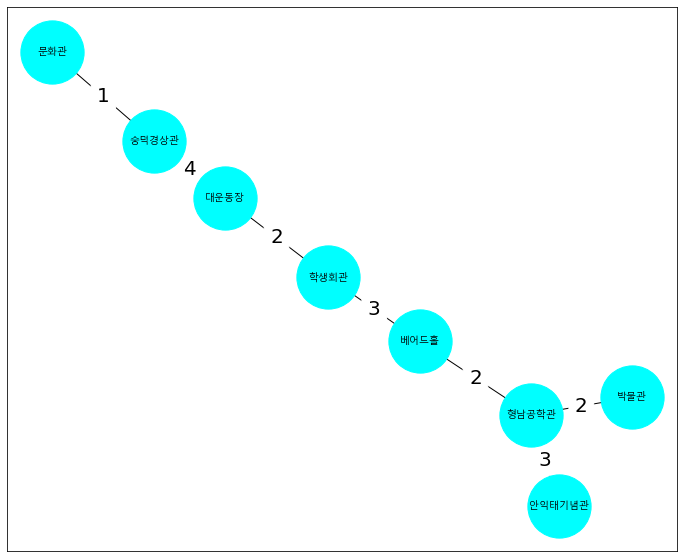

In [13]:
Ptree = prim(graph)
edges = change_form(Ptree)

G = nx.Graph()
G.add_nodes_from(Nodes)
G.add_weighted_edges_from(edges)
draw_graph(G)

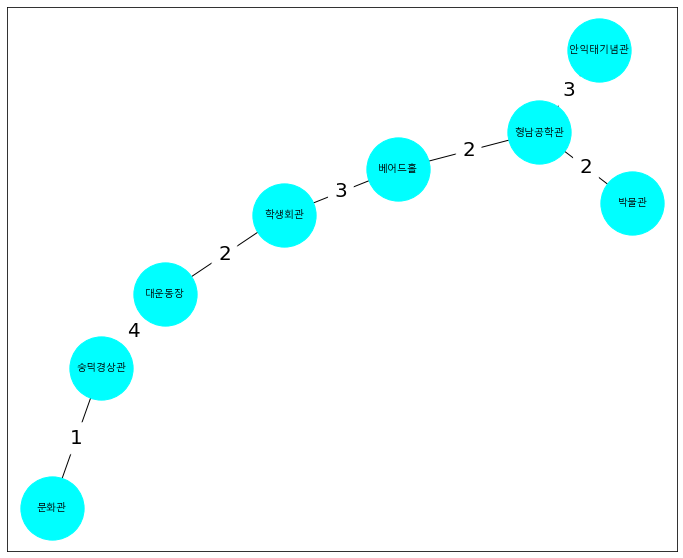

In [14]:
Ktree = kruskal(graph)
edges = change_form(Ktree)
G = nx.Graph()
G.add_nodes_from(Nodes)
G.add_weighted_edges_from(edges)
draw_graph(G)

<br/>※ 풀이조건
<ol>
    <li>위 최소 신장 트리에 대해, draw_graph로 출력하기 위해 적절히 변환하고 함수를 실행하여 그래프로 표현한다.</li>
    <li>응용에 대해 본인의 생각을 2~3줄 내외로 print() 함수를 통해 자유롭게 출력한다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>그래프가 잘 표현되었고 응용을 기술했으면 정답처리한다.</li>
    <li>둘 중 하나라도 미흡할 시 0.5점 감점한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [11]:
print("두 알고리즘 함수의 리턴값은 (거리, (노드1, 노드2))의 형식으로 출력된다.\n이를 그래프를 그리기 위해 필요한 엣지 정보의 형태인 (노드1, 노드2, 뎁스)의 형식으로 전환하여 그래프를 출력하는 방법을 사용하였다.")

두 알고리즘의 리턴값은 (거리, (노드1, 노드2))의 형식으로 출력된다.
이를 그래프를 그리기 위해 필요한 정보인 (노드1, 노드2, 뎁스)의 형식으로 전환하여 그래프를 출력하는 방법을 사용하였다.
